In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta
#data = yf.download(tickers = '^RUI', start = '2012-03-11',end = '2022-07-10')
data  = yf.download('TRX-USD', period = '1500d', interval = '1d')
#data = yf.download('^RUI', period = '10d', interval = '1h')
print(data.count())
data.head(5)

[*********************100%***********************]  1 of 1 completed
Open         1500
High         1500
Low          1500
Close        1500
Adj Close    1500
Volume       1500
dtype: int64


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-09-23 00:00:00+00:00,0.023198,0.024604,0.023094,0.023791,0.023791,138225000
2018-09-24 00:00:00+00:00,0.023739,0.024093,0.021965,0.022089,0.022089,116603000
2018-09-25 00:00:00+00:00,0.022029,0.022029,0.020275,0.021280,0.021280,126284000
2018-09-26 00:00:00+00:00,0.021274,0.021970,0.020384,0.021028,0.021028,110081000
2018-09-27 00:00:00+00:00,0.021097,0.022797,0.020747,0.022507,0.022507,124196000


In [2]:
# Be aware that some of these counters have long initializing periods.
# Its something thats not recommended (or use extreme data set size)


# Adding indicators
data['RSI']=ta.momentum.rsi(data.Close, length=15)
data['EMAF']=ta.ema(data.Close, length=20)
data['EMAM']=ta.ema(data.Close, length=100)
data['EMAS']=ta.ema(data.Close, length=150)

data['EMAS']=ta.ema(data.Close, length=150)

# Adding volume indicators
data["MFII"] = ta.volume.mfi(high =data.High, low =data.Low, close =data.Close, volume =data.Volume, windows =15 )
#data['EOM']=ta.volume.cmf(data.High,data.Low,data.Close,data.Volume,15)
#data['VWAP']=ta.volume.vwap(data.High,data.Low,data.Close,data.Volume,15)
data['VPT']=ta.volume.cmf(high = data.High, low = data.Low, close = data.Close,volume = data.Volume)

# Adding Votality indicators
#data['ADX']=ta.adx(high = data.High, low = data.Low,close=data.Close,window =30, fillna=False)
#data['DPO']=ta.volatility.dpo(data.Close,data.Volume,15)
#data['ATR']=ta.volatility.atr(data.High, data.Low, data.Close, data.Volume,15,False)
data.tail(4)

,Open,High,Low,Close,Adj Close,Volume,RSI,EMAF,EMAM,EMAS,MFII,VPT
Date,,,,,,,,,,,,
2022-10-28 00:00:00+00:00,0.062979,0.063725,0.062703,0.063562,0.063562,320154857,57.502960,0.062274,0.063768,0.065068,42.880648,-0.091011
2022-10-29 00:00:00+00:00,0.063563,0.064425,0.063517,0.064180,0.064180,362144152,60.172663,0.062455,0.063776,0.065056,52.058736,-0.072138
2022-10-30 00:00:00+00:00,0.064177,0.064725,0.063020,0.063136,0.063136,324343312,54.029269,0.062520,0.063763,0.065031,51.678099,-0.064925
2022-10-31 00:00:00+00:00,0.063096,0.063305,0.062506,0.062658,0.062658,348529504,51.454597,0.062533,0.063741,0.064999,44.030166,-0.065581


In [3]:
data['Target'] = data['Adj Close']-data.Open
data['Target'] = data['Target'].shift(-1)

data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]

data['TargetNextClose'] = data['Adj Close'].shift(-1)

data.dropna(inplace=True)
data.reset_index(inplace = True)
data.drop(['Volume', 'Close', 'Date'], axis=1, inplace=True)

In [4]:
data_set = data.iloc[:, 0:11]#.values
pd.set_option('display.max_columns', None)
data_set.head(5)

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,MFII,VPT,Target
0,0.025008,0.025988,0.024993,0.024993,50.073511,0.025037,0.023181,0.021480,40.029975,-0.255817,0.000247
1,0.024981,0.025428,0.024452,0.025228,51.323723,0.025055,0.023221,0.021530,41.289628,-0.168132,-0.000397
2,0.025201,0.025364,0.024643,0.024804,48.953968,0.025031,0.023253,0.021573,41.495872,-0.244921,0.000368
3,0.024790,0.025160,0.024727,0.025158,50.978713,0.025043,0.023290,0.021621,38.552255,-0.223900,0.000324
4,0.025131,0.025539,0.024925,0.025455,52.666416,0.025082,0.023333,0.021671,37.052471,-0.163469,-0.001656
5,0.025465,0.027183,0.022805,0.023809,43.727220,0.024961,0.023343,0.021700,35.133246,-0.223794,0.000736
6,0.023714,0.024661,0.023714,0.024450,47.448890,0.024912,0.023365,0.021736,35.701672,-0.137054,0.000068
7,0.024344,0.024680,0.023958,0.024412,47.250403,0.024865,0.023385,0.021772,42.370123,-0.084352,-0.000254
8,0.024385,0.024467,0.023639,0.024131,45.734611,0.024795,0.023400,0.021803,42.263106,-0.060572,-0.000265
9,0.024132,0.024339,0.023737,0.023867,44.303948,0.024707,0.023409,0.021830,41.953105,-0.114800,-0.000152


In [5]:
data_set2 = data_set.diff(periods=-1)
#over write with original target.
data_set2['Target'] = data_set['Target']

data_set2.head(5)
data_set = data_set2
#print(data_set.shape)
print(data.shape)
#print(type(data_set))

(1350, 13)


In [6]:
#Target column Categories
#y =[1 if data.Open[i]>data.Close[i] else 0 for i in range(0, len(data))]
#yi = [data.Open[i]-data.Close[i] for i in range(0, len(data))]
#print(yi)
#print(len(yi))

In [7]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

[[0.42189103 0.55882302 0.37666375 ... 0.48514157 0.18049458 0.58058505]
 [0.41807892 0.54977476 0.36695026 ... 0.51372149 0.769144   0.57059048]
 [0.42781749 0.55232872 0.36837012 ... 0.59918013 0.41908404 0.5824629 ]
 ...
 [0.41246115 0.53583753 0.35868318 ... 0.27030713 0.42677083 0.58632735]
 [0.41199809 0.54313452 0.37607986 ... 0.52964414 0.46850252 0.56059588]
 [       nan        nan        nan ...        nan        nan 0.56996764]]


In [8]:
# multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 30
print(data_set_scaled.shape[0])
for j in range(8):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)

1350
[[[0.42189103 0.55882302 0.37666375 ... 0.56004849 0.73138092 0.76198435]
  [0.41807892 0.54977476 0.36695026 ... 0.56413746 0.73485575 0.76540213]
  [0.42781749 0.55232872 0.36837012 ... 0.56064305 0.73244217 0.76316062]
  ...
  [0.42328003 0.5536969  0.36968383 ... 0.56323606 0.74810781 0.78170903]
  [0.42061002 0.54933694 0.36976344 ... 0.56319329 0.7481546  0.78187813]
  [0.42170581 0.5490998  0.3754562  ... 0.56869342 0.75268113 0.78636738]]

 [[0.41807892 0.54977476 0.36695026 ... 0.56413746 0.73485575 0.76540213]
  [0.42781749 0.55232872 0.36837012 ... 0.56064305 0.73244217 0.76316062]
  [0.41621147 0.54169332 0.36685737 ... 0.5580085  0.73050275 0.7613601 ]
  ...
  [0.42061002 0.54933694 0.36976344 ... 0.56319329 0.7481546  0.78187813]
  [0.42170581 0.5490998  0.3754562  ... 0.56869342 0.75268113 0.78636738]
  [0.43132091 0.55181791 0.36783932 ... 0.56547711 0.75049055 0.78440382]]

 [[0.42781749 0.55232872 0.36837012 ... 0.56064305 0.73244217 0.76316062]
  [0.41621147 0.5

In [9]:
#also comprehensions for X
#X = np.array([data_set_scaled[i-backcandles:i,:4].copy() for i in range(backcandles,len(data_set_scaled))])
#print(X)
#print(X.shape)

In [10]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

1056
(1056, 30, 8)
(264, 30, 8)
(1056, 1)
(264, 1)
[[0.58143863]
 [0.6026383 ]
 [0.56008379]
 ...
 [0.61333122]
 [0.57010941]
 [0.60294873]]


In [14]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
np.random.seed(10)

lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=500, shuffle=True, validation_split = 0.1)

Epoch 1/500
64/64 [==============================] - 2s 18ms/step - loss: 0.0194 - val_loss: 0.0039
Epoch 2/500
64/64 [==============================] - 1s 14ms/step - loss: 0.0040 - val_loss: 0.0032
Epoch 3/500
64/64 [==============================] - 1s 14ms/step - loss: 0.0037 - val_loss: 0.0030
Epoch 4/500
64/64 [==============================] - 1s 14ms/step - loss: 0.0036 - val_loss: 0.0035
Epoch 5/500
64/64 [==============================] - 1s 14ms/step - loss: 0.0035 - val_loss: 0.0046
Epoch 6/500
64/64 [==============================] - 1s 14ms/step - loss: 0.0036 - val_loss: 0.0031
Epoch 7/500
64/64 [==============================] - 1s 14ms/step - loss: 0.0038 - val_loss: 0.0029
Epoch 8/500
64/64 [==============================] - 1s 14ms/step - loss: 0.0037 - val_loss: 0.0029
Epoch 9/500
64/64 [==============================] - 1s 14ms/step - loss: 0.0036 - val_loss: 0.0034
Epoch 10/500
64/64 [==============================] - 1s 13ms/step - loss: 0.0036 - val_loss: 0.0029

In [15]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

9/9 [==============================] - 0s 5ms/step
[0.57904994] [0.55868695]
[0.59571874] [0.50519124]
[0.6042005] [0.56809179]
[0.61734676] [0.59208501]
[0.62394464] [0.57858307]
[0.59643304] [0.61249313]
[0.5928029] [0.5708233]
[0.60322165] [0.51515474]
[0.5692247] [0.58674628]
[0.572814] [0.58309921]


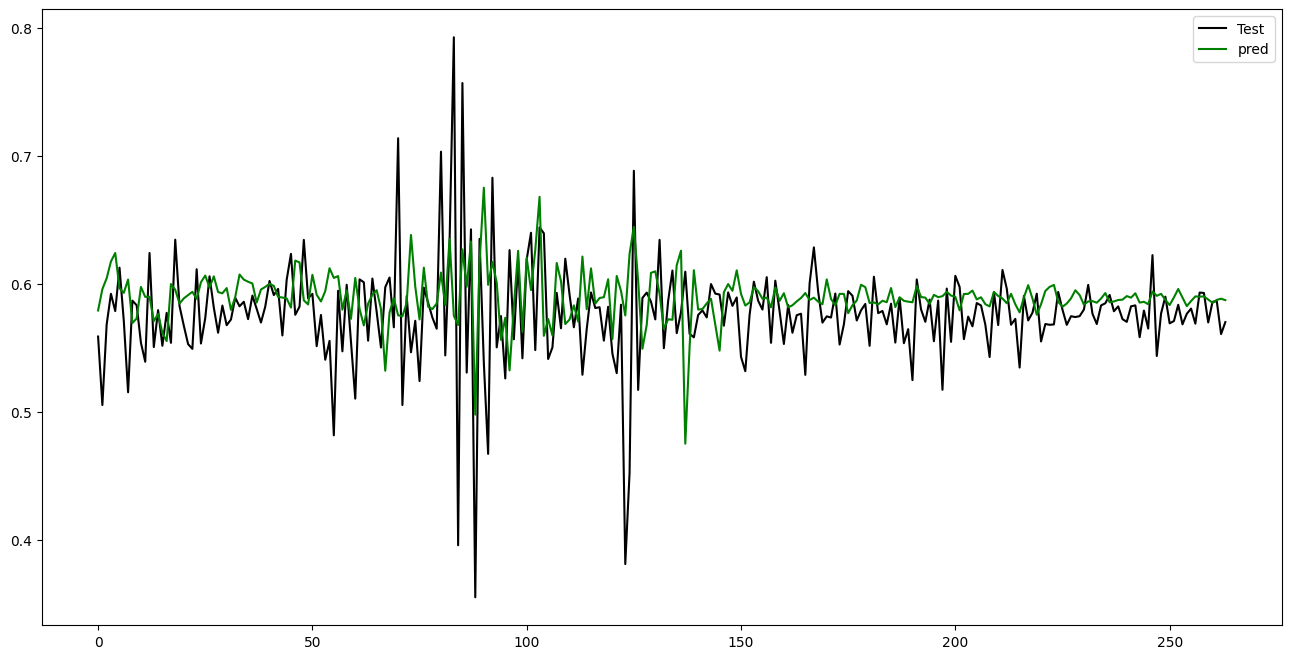

In [16]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()